In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

In [16]:
startDate = '2021-01-01'
endDate = '2025-01-01'
appleData = yf.download('AAPL', start=startDate, end=endDate)['Close']
vixData = yf.download('^VIX', start=startDate, end=endDate)['Close']

appleData.columns = ['Close']
vixData.columns = ['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [17]:
vixData['60dayHigh'] = vixData['Close'].rolling(window=60).max()
vixData

,Close,60dayHigh
Date,,
2021-01-04,26.969999,NaN
2021-01-05,25.340000,NaN
2021-01-06,25.070000,NaN
2021-01-07,22.370001,NaN
2021-01-08,21.559999,NaN
...,...,...
2024-12-24,14.270000,27.620001
2024-12-26,14.730000,27.620001
2024-12-27,15.950000,27.620001


In [18]:
vixData['reachedHigh'] = abs(vixData['Close'] - vixData['60dayHigh']) / vixData['60dayHigh'] <= 0.03

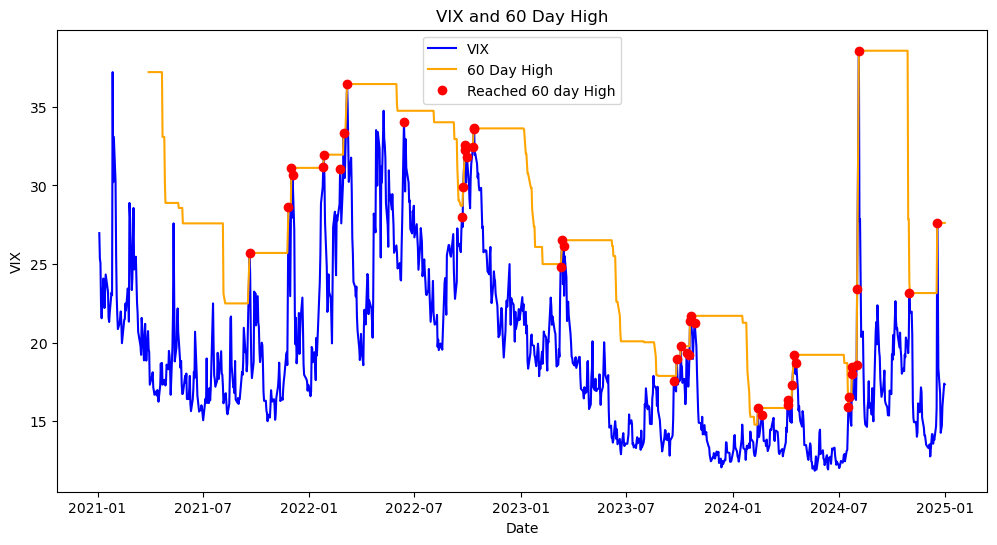

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(vixData['Close'], label='VIX', color='blue')
plt.plot(vixData['60dayHigh'], label='60 Day High', color='orange')
plt.plot(vixData[vixData['reachedHigh']]['Close'], 'ro', label='Reached 60 day High')
plt.title('VIX and 60 Day High')
plt.xlabel('Date')
plt.ylabel('VIX')
plt.legend()

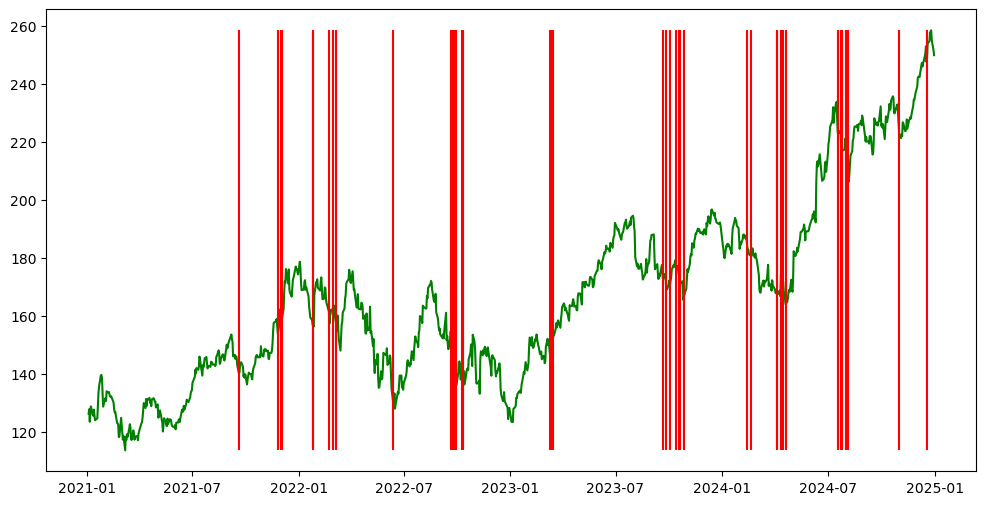

In [20]:
# lay over the apple data with the same dates reaching the 60 day high
# use vertical lines to indicate the dates
plt.figure(figsize=(12, 6))
plt.plot(appleData, label='AAPL', color='green')
plt.vlines(vixData[vixData['reachedHigh']].index, ymin=appleData.min(), ymax=appleData.max(), color='red', label='VIX Reached 60 Day High')


<Axes: xlabel='Date'>

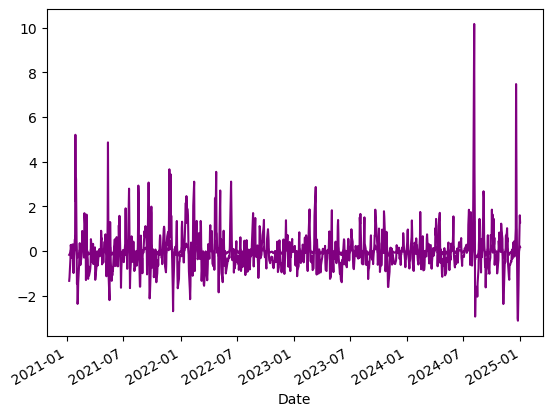

In [24]:
def computeZscore(data):
    mean = data.mean()
    std = data.std()
    zscore = (data - mean) / std
    return zscore
vixData['3dayChange'] = vixData['Close'].pct_change(periods=3)
vixData['3dayChange'].plot(label='3 Day Change', color='purple')
vixData['3dayChange'].describe()
vixData['3dayChangeZscore'] = computeZscore(vixData['3dayChange'])
vixData['3dayChangeZscore'].plot(label='3 Day Change Zscore', color='purple')

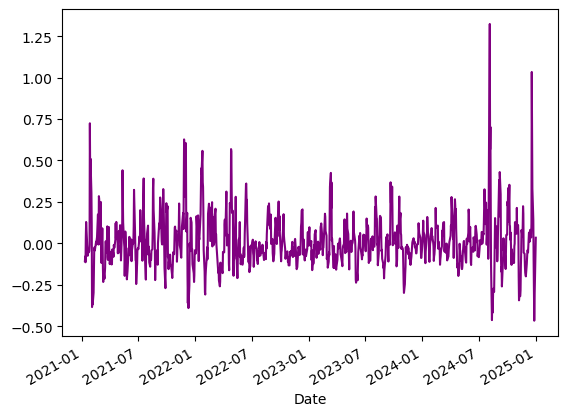

In [29]:
vixData['5dayChange'] = vixData['Close'].pct_change(periods=5)
vixData['5dayChange'].plot(label='5 Day Change', color='purple')
vixData['5dayChangeZscore'] = computeZscore(vixData['5dayChange'])

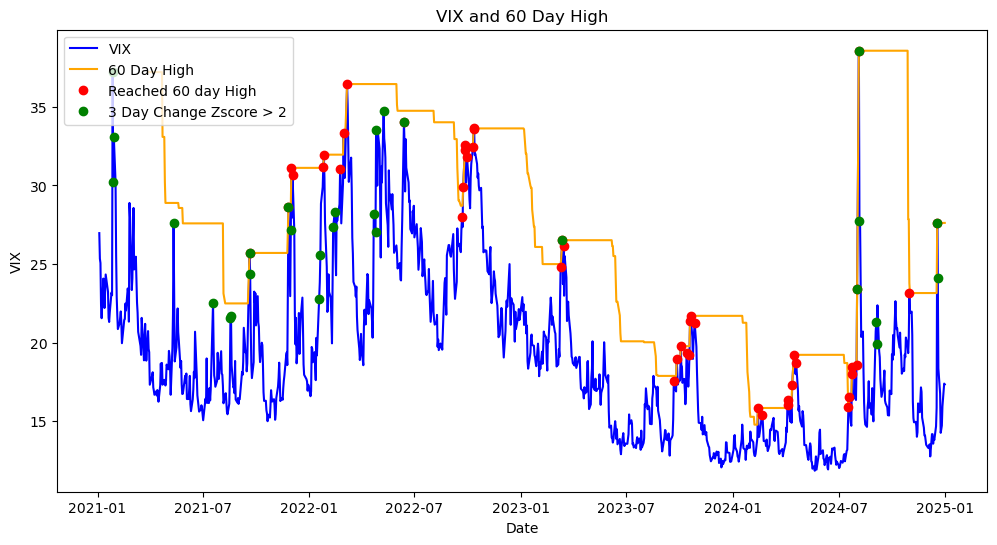

In [27]:

plt.figure(figsize=(12, 6))
plt.plot(vixData['Close'], label='VIX', color='blue')
plt.plot(vixData['60dayHigh'], label='60 Day High', color='orange')
plt.plot(vixData[vixData['reachedHigh']]['Close'], 'ro', label='Reached 60 day High')
plt.plot(vixData[vixData['3dayChangeZscore'] > 2]['Close'], 'go', label='3 Day Change Zscore > 2')
plt.title('VIX and 60 Day High')
plt.xlabel('Date')
plt.ylabel('VIX')
plt.legend()

In [35]:
def pctreturnDdaysAfterDate(data, startDate, numDays=5):
    """
    Calculate the percentage return of a stock `numDays` after a given `startDate`.

    Parameters:
    data (pd.DataFrame): DataFrame containing stock prices with a 'Close' column.
    startDate (str or pd.Timestamp): The starting date for the calculation.
    numDays (int): The number of days after the startDate to calculate the return. Default is 5.

    Returns:
    float: The percentage return of the stock after `numDays` from `startDate`.
    """
    endDate = data.index[data.index.get_loc(startDate) + numDays]
    startPrice = data.loc[startDate]['Close']
    endPrice = data.loc[endDate]['Close']
    return (endPrice - startPrice) / startPrice


applVixSpike = appleData[vixData['3dayChangeZscore'] > 2].copy()
applVixSpike['3dayChangeAfterSpike'] = applVixSpike.apply(lambda row: pctreturnDdaysAfterDate(appleData, row.name, 3), axis=1)
applVixSpike['5dayChangeAfterSpike'] = applVixSpike.apply(lambda row: pctreturnDdaysAfterDate(appleData, row.name, 5), axis=1)

In [37]:
applVixSpike

,Close,3dayChangeAfterSpike,5dayChangeAfterSpike
Date,,,
2021-01-27,138.579773,-0.055751,-0.057159
2021-01-28,133.731537,-0.015318,0.002188
2021-01-29,128.727249,0.015005,0.037923
2021-05-12,120.145065,0.028508,0.015639
2021-07-19,139.404266,0.030537,0.045911
2021-08-18,143.445251,0.022889,0.013665
2021-08-19,143.778488,0.019905,0.005726
2021-09-20,140.093384,0.027214,0.017000
2021-09-21,140.573578,0.024333,-0.010597


In [1]:
from ibapi.client import EClient
from ibapi.wrapper import EWrapper
from ibapi.contract import Contract
from ibapi.common import *
from ibapi.utils import iswrapper
import threading
import time

class IBApp(EWrapper, EClient):
    def __init__(self):
        EClient.__init__(self, self)
        self.data = []  # to store bars

    def historicalData(self, reqId: int, bar):
        print(f"Time: {bar.date}, Close: {bar.close}")
        self.data.append((bar.date, bar.close))

    def historicalDataEnd(self, reqId: int, start: str, end: str):
        print("Done fetching data")
        self.disconnect()

def run_loop(app):
    app.run()

# Create app and connect
app = IBApp()
app.connect("127.0.0.1", 7496, clientId=1)  # or port 4001 for IB Gateway

# Start networking thread
thread = threading.Thread(target=run_loop, args=(app,))
thread.start()
time.sleep(1)

# Define contract (AAPL stock)
contract = Contract()
contract.symbol = "AAPL"
contract.secType = "STK"
contract.exchange = "SMART"
contract.currency = "USD"

# Request historical data
app.reqHistoricalData(
    reqId=1,
    contract=contract,
    endDateTime="",
    durationStr="1 M",         # past 1 month
    barSizeSetting="1 day",    # daily bars
    whatToShow="TRADES",
    useRTH=1,
    formatDate=1,
    keepUpToDate=False,
    chartOptions=[]
)

# Wait for data to come in
time.sleep(5)

ERROR -1 2104 Market data farm connection is OK:usfarm.nj
ERROR -1 2104 Market data farm connection is OK:hfarm
ERROR -1 2104 Market data farm connection is OK:cashfarm
ERROR -1 2104 Market data farm connection is OK:usfarm
ERROR -1 2106 HMDS data farm connection is OK:euhmds
ERROR -1 2106 HMDS data farm connection is OK:apachmds
ERROR -1 2106 HMDS data farm connection is OK:ushmds
ERROR -1 2106 HMDS data farm connection is OK:fundfarm
ERROR -1 2158 Sec-def data farm connection is OK:secdefhk


Time: 20250416, Close: 194.27
Time: 20250417, Close: 196.98
Time: 20250421, Close: 193.16
Time: 20250422, Close: 199.74
Time: 20250423, Close: 204.6
Time: 20250424, Close: 208.37
Time: 20250425, Close: 209.28
Time: 20250428, Close: 210.14
Time: 20250429, Close: 211.21
Time: 20250430, Close: 212.5
Time: 20250501, Close: 213.32
Time: 20250502, Close: 205.35
Time: 20250505, Close: 198.89
Time: 20250506, Close: 198.51
Time: 20250507, Close: 196.25
Time: 20250508, Close: 197.49
Time: 20250509, Close: 198.53
Time: 20250512, Close: 210.79
Time: 20250513, Close: 212.93
Time: 20250514, Close: 212.33
Time: 20250515, Close: 211.93
Done fetching data


In [3]:
app.data

[('20250416', 194.27),
 ('20250417', 196.98),
 ('20250421', 193.16),
 ('20250422', 199.74),
 ('20250423', 204.6),
 ('20250424', 208.37),
 ('20250425', 209.28),
 ('20250428', 210.14),
 ('20250429', 211.21),
 ('20250430', 212.5),
 ('20250501', 213.32),
 ('20250502', 205.35),
 ('20250505', 198.89),
 ('20250506', 198.51),
 ('20250507', 196.25),
 ('20250508', 197.49),
 ('20250509', 198.53),
 ('20250512', 210.79),
 ('20250513', 212.93),
 ('20250514', 212.33),
 ('20250515', 211.93)]